[Go to Module 4](module4.ipynb)

# Module 5: S3 Configuration

## Excercise 1: Writing a Python Program to configure S3 User and Bucket

In this exercise, you use the Python client library (PCL) to create a Simple Storage Service (S3) storage user and bucket on your ONTAP based storage system.

### Objectives

This exercise focuses on enabling you to do the following:

- Write a Python program to create an S3 user and to create an S3 bucket by using the PCL.
- Verify access to S3 object storage  

### Task 1 Setup the Environment in the cluster to practice writing a Python Script to create an S3 User and an S3 bucket.

You need to setup the cluster as a prerequisite to run the Python program. 

- Step 1  
  
  Login in to the [Cluster 1 Ontap System Manager (192.168.0.101)](https://192.168.0.101). 
  
  Accept any warnings and login using `admin` and `Netapp1!`.

- Step 2

  In the System Manager navigation panel on the left, navigate to `STORAGE > Storage VMs` and click `nas_svm`

- Step 3 

  Navigate to the `Settings` tab of `nas_svm` on the right, scroll down, and click the gear (or settings) icon to the right of S3

- Step 4 
  
  In the Configure S3 dialog box, provide the following values and then click Save:

  - S3 Server Name: `nas_svm.demo.netapp.com`
  - Enable TLS: `<select>`
  - Port: `443`
  - Use System-generated certificate: `<select>`
  - Network Interface: 
    - Cluster1-01
      - IP Address: `192.168.0.203`
      - Subnet mask: `24`
      - Add optional gateway: `192.168.0.1`
      - Broadcast Domain: `<default>`

- Step 5

  When the system displays the Configured S3 window, click `Show secret key` and then click `Download` to save the certificate.  

- Step 6  
  
  When the file name `cluster1_nas_svm_s3_details.txt` (or similar) is displayed in the top-right corner of the window, click it.

- Step 7  
  
  The file opens in with a text editor like Notepad or VS Code. Make sure that you save it. This window is your only opportunity to view and capture the S3 user access/secret keys. If you have not downloaded or otherwise saved the keys, and the keys are lost, you must generate new access keys for the user.

    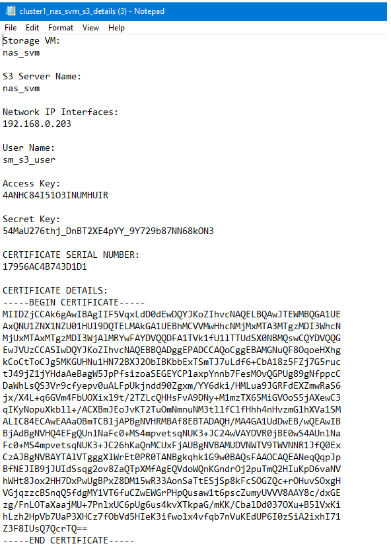
  
- Step 8 

  Save the file as `nas_svmcert.crt` on your Windows `Jumphost`.


### Task 2: Examine the documentation for the Python Client Library and REST API for S3

**Step 1:**
  
Review the documentation for `Python Client Library` Ontap S3 User:

[Module **netapp_ontap.resources.s3_user**](https://library.netapp.com/ecmdocs/ECMLP3319064/html/resources/s3_user.html)

Follow the examples, such as under Creating an S3 User Configuration, to create an S3 user

You must provide at least the following parameters to create the S3 user.

```
resource.name: "s3_user"
vserver: "nas_svm"
```
**Step 2:**

Review the documentation for `Python Client Library` Ontap S3 User:  

[Module **netapp_ontap.resources.s3_bucket**](https://library.netapp.com/ecmdocs/ECMLP3319064/html/resources/s3_bucket.html)  

On the right side, look at the examples of how to create the S3 bucket.

Follow the example `Creating an S3 bucket along with policies and conditions for an SVM`

You must provide at least the following parameters:

```
 Name: "s3-bucket"  
 Vserver: "nas_svm"  
 Aggregate: "aggr1_cluster1_01_data"  
 Comment: "S3 Bucket"  
 Size: 102005473280  
 Policy:  
       Statements:  
         sid: 1  
         resources:  
          - s3-bucket  
          - s3-bucket/*  
         actions:  
          - GetObject  
          - PutObject  
          - DeleteObject  
          - ListBucket  
         effect: allow  
         principals:  
          - s3_user  
          - sm_s3_user  
```     


### Task 3 Write Python code to Create a S3 User and Bucket

Write a Python program `S3_Server.py` that uses PCL to do the following:

The main() function calls the following functions:
  - parse_args()
  - make_s3_user
  - make_bucket

The program should have the following sections:
  - An Header Comment:
      
      This section usually includes details such as the file name, author, date, purpose of the program, and any other relevant information. 
      
      It"s a good practice to include such comments for better readability and maintainability of the code

  - An Import Section:
      This contains the list of libraries/modules that need to be called in the program
  - The Function definitions
  - The Command Line Arguments Parsing Section
  - The Main Section  

You can start from scratch and create a python script called [S3_Server.py](../S3_Server.py)  
To get help with the structure of the script, you can review [volume.py](../volume.py)

**OR**  

Follow the guided Jupyter Notebook example [module5_code.ipynb](module5_code.ipynb).

If prompted to select the kernel, select `.venv(Python3.6.8)`



### Task 4: Run and Verify that S3 user and S3 bucket have been created

If you created the python file [S3_Server.py](../S3_Server.py), you can save the file using `CTRL + S` and open a terminal using ```CTRL + ` ``` and run:

```
python S3_Server.py -c cluster1 -vs nas_svm -a aggr1_cluster1_01_data -s S3_Server -b s3-bucket -un s3_user -n
102005473280 -u admin -p Netapp1!
```

To verify that the s3_user and the s3-bucket have been created successfully:  

Use [this](module5_verify.ipynb) Jupyter Notebook to run the code:

[module5_verify.ipynb](module5_verify.ipynb)

If prompted to select the kernel, select `.venv(Python3.6.8)`

 **OR**

Go to the ONTAP CLI session and run the following commands:

```
cluster1::> object-store-server user show
cluster1::> object-store-server bucket show
```
You can open a Terminal using ```CTRL+` ```, then open an ssh session using `ssh admin@cluster1`


### Task 5 Verify Access to S3 Object Storage  
In this task, you verify access to an S3 object on an ONTAP based storage system.
- Step 1  
  
  From the desktop of the Windows `Jumphost`, double-click the S3 Browser icon for it to open to the Add New Account page.
  
  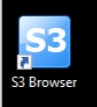
  
- Step 2

  Specify the following parameters to connect to the ONTAP S3 SVM:  
    - Display name: `nas_svm`
    - Account type: `S3 Compatible Storage`
    - REST Endpoint: `192.168.0.203`
    - Access Key Id: `<copy the value from your saved file>`
    - Secret Access Key: `<copy the value from your saved file>`
    - Encrypt Access Keys with a password: `<not selected> (default)`
    - Use secure transfer (SSL/TLS): `<selected> (default)`
  
  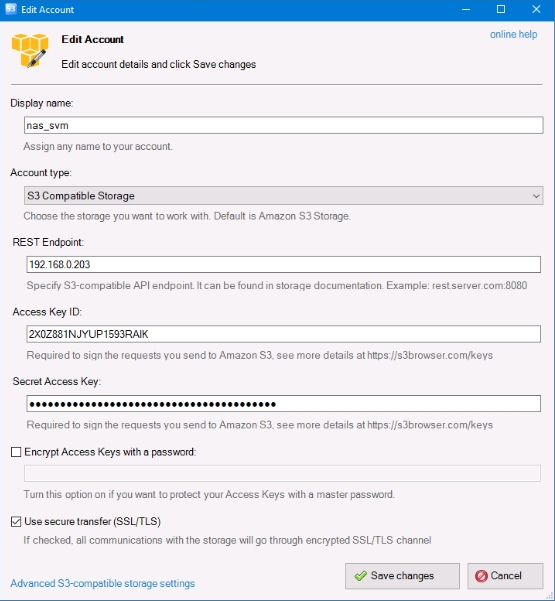
- Step 3 

  Click `Advanced S3-compatible storage settings` and then, from the Signature version menu, select `Signature V4`, and then click `Close`

  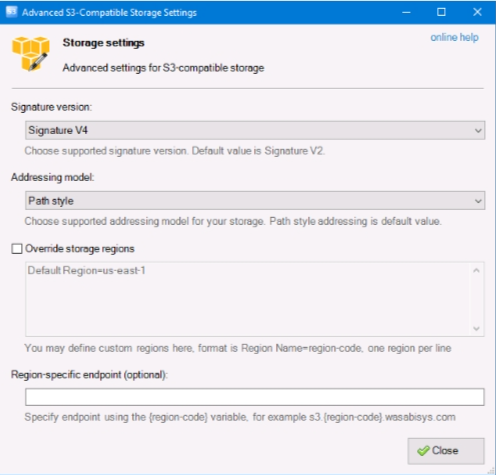

- Step 4 
  
  Click on the `Add new account` button.

- Step 5

  Click `Yes` when you are asked if you would like to add an external bucket.

- Step 6  
  
  Enter s3-bucket in the Bucket name field and then click Add External bucket.

  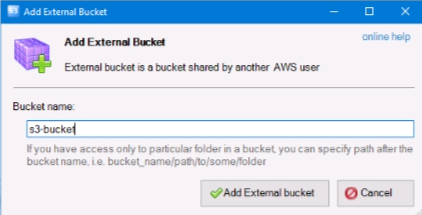

- Step 7  
  
  When you see s3-bucket in the left pane, select `Files -> Upload > Upload files`

    
- Step 8 

  Navigate to where you saved the file `nas_svmcert.crt` on your Windows `Jumphost` and double click.

- Step 9

  See that the S3 object nas_svm_cert.txt is in the bucket s3-bucket

  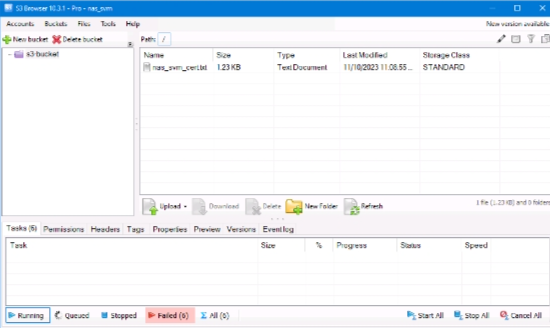

[Go to Module 6](module6.ipynb)